# Code to perform linear regression using stochastic gradient descent method

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Data generation

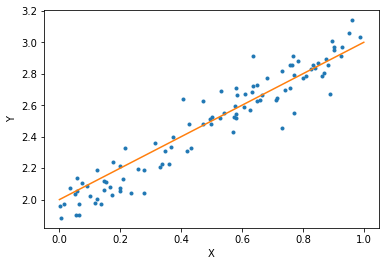

In [2]:
Slope = 1
Intercept = 2

NumberPoints = 100
NoiseVariance = 0.1

Xmin = 0
Xmax = 1

Ymin = Slope * Xmin + Intercept
Ymax = Slope * Xmax + Intercept

PointX = (Xmax-Xmin) * np.random.rand( NumberPoints , 1 ) + Xmin
PointY = Slope * PointX + Intercept

PointY = PointY + NoiseVariance * np.random.randn( NumberPoints , 1  )

plt.plot( PointX , PointY , '.' )
plt.plot( [Xmin,Xmax] , [Ymin,Ymax] )
plt.xlabel( 'X' )
plt.ylabel( 'Y' )
plt.show()

## Linear regression using stochastic gradient descent

Let the $i$ th data point be: <br>
$\{ x_i , y_i \}$ <br>
where $i \in \{1,2,...N\}$, with $N$ data points. <br>
<br>
Our goal is to fit the line of the form $y = m x + c$ <br>
<br>
Let the initial estimate for slope and intercept be: $m_0$, $c_0$ <br>
Then the estimated $y_i$'s are <br>
$\bar{y}_i := m_0 x_i + c_0$ <br>
<br>
We define the squared error function   $E( m , c ) := \sum_{i=1}^{N} (y_i - \bar{y}_i)^2$ <br>
<br>
Now, the parameters $(m,c)$ are updated using the gradient descent algorithm as: <br>
$m \;\; \rightarrow \;\; m - \eta  \frac{\partial E}{\partial m} \;\;\; = \;\;\; m + \eta \sum_{i=1}^{N} 2 (y_i - \bar{y}_i) x_i $ <br>
$c \;\;\; \rightarrow \;\;\; c - \eta  \frac{\partial E}{\partial c} \;\;\;\; = \;\;\;\; c + \eta \sum_{i=1}^{N} 2 (y_i - \bar{y}_i) $ <br>
<br>
where, $\eta$ is the $Learning \; rate$.
<br>
<br>
Now, in stochastic gradient descent approach, a random $N_B$ number of data points are selected as a batch and training performed on them. In effect, the summation is modified as, <br>
$\;\;\; \sum_{i=1}^{N} (.)_i \;\; \rightarrow \;\; \sum_{j=1}^{N_B} (.)_{\mathcal{P}(j)}$ <br>
where $\mathcal{P}$ is a random permutation operation.

Error =  60613.073039710835 Estimated Slope =  -41.049742744856246 Estimated Intercept -35.462039284800426
Error =  28619.367480599863 Estimated Slope =  -36.347457748962995 Estimated Intercept -25.451264765139136
Error =  22096.25637619927 Estimated Slope =  -30.888575495419587 Estimated Intercept -16.776089482840412
Error =  11679.683113438236 Estimated Slope =  -27.223137746074826 Estimated Intercept -10.556436266284521
Error =  7258.274531907814 Estimated Slope =  -24.325379802868383 Estimated Intercept -5.516782051279216
Error =  3844.3498672206224 Estimated Slope =  -22.32033002830228 Estimated Intercept -2.0486305827058207
Error =  2277.232235169239 Estimated Slope =  -20.808375439526092 Estimated Intercept 0.49339337584507037
Error =  1408.5561106935147 Estimated Slope =  -19.64487646974701 Estimated Intercept 2.4903118226003804
Error =  889.3502936758432 Estimated Slope =  -18.745650640266653 Estimated Intercept 3.9530470456871996
Error =  894.7774570603138 Estimated Slope =  

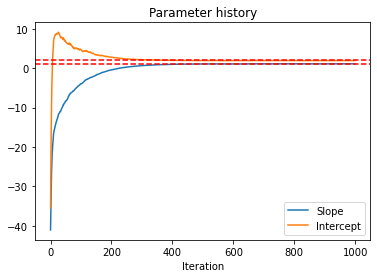

In [3]:
SlopeEstimate = -50
InterceptEstimate = -50

NumberIterations = 1000
LearningRate = 0.01
BatchSize = 10

SlopeHistory = []
InterceptHistory = []

for It in range( NumberIterations ):
    Index = np.random.permutation( NumberPoints )

    BatchPointX = PointX[ Index[1:BatchSize] ]
    BatchPointY = PointY[ Index[1:BatchSize] ]
    PointYEstimate = SlopeEstimate * BatchPointX + InterceptEstimate

    Error = np.sum( ( BatchPointY - PointYEstimate )**2 )
    dError_dSlope = np.sum( -2 * ( BatchPointY - PointYEstimate ) * BatchPointX )
    dError_dIntercept = np.sum( -2 * ( BatchPointY - PointYEstimate ) )

    SlopeEstimate = SlopeEstimate - LearningRate * dError_dSlope
    InterceptEstimate = InterceptEstimate - LearningRate * dError_dIntercept

    SlopeHistory = np.append( SlopeHistory , SlopeEstimate )
    InterceptHistory = np.append( InterceptHistory , InterceptEstimate )

    print("Error = ",Error, "Estimated Slope = ",SlopeEstimate, "Estimated Intercept",InterceptEstimate) 

plt.plot( SlopeHistory )
plt.plot( InterceptHistory )
plt.title( 'Parameter history' )
plt.xlabel( 'Iteration' )
plt.legend( ['Slope' , 'Intercept'] )
plt.axhline( y=Slope , color='r' , linestyle='--' )
plt.axhline( y=Intercept , color='r' , linestyle='--' )
plt.show()

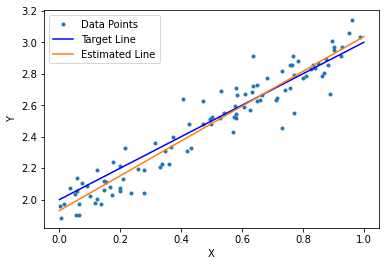

In [4]:
plt.plot( PointX , PointY , '.' )
plt.plot( [Xmin,Xmax] , [Ymin,Ymax] , 'b' )
plt.plot( [Xmin,Xmax] , [SlopeEstimate*Xmin+InterceptEstimate , SlopeEstimate*Xmax+InterceptEstimate])
plt.xlabel( 'X' )
plt.ylabel( 'Y' )
plt.legend( ['Data Points','Target Line','Estimated Line'])
plt.show()

## Plotting the "error-landscape" and trajectory

We scan the parameter space of $(m,c)$ as a uniform grid and calculate the error function to generate the error-landscape. The plot of the $(m,c)$ history shows how the gradient descent operation converges towards the error function minima.

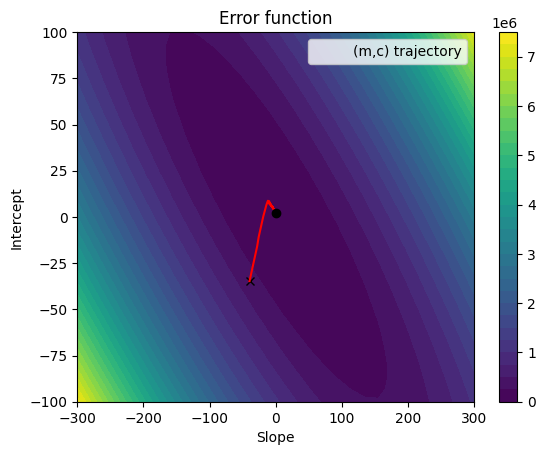

In [18]:
SlopeMax = 300
SlopeMin = -300

InterceptMax = 100
InterceptMin = -100

BatchSize = 10
GridSize = 30

Index = np.random.permutation( len(PointX) )

BatchPointX = PointX[ Index[1:BatchSize] ]
BatchPointY = PointY[ Index[1:BatchSize] ]

SlopeAxis = np.linspace( SlopeMin , SlopeMax , GridSize )
InterceptAxis = np.linspace( InterceptMin , InterceptMax , GridSize )

SlopeGrid , InterceptGrid = np.meshgrid( SlopeAxis , InterceptAxis )

ErrorGrid = np.zeros( [GridSize , GridSize] )
BatchErrorGrid = np.zeros( [GridSize , GridSize] )

for i in range(GridSize):
    for j in range(GridSize):
        PointYEstimate = SlopeGrid[i][j] * PointX + InterceptGrid[i][j]
        ErrorGrid[i][j] = np.sum( (PointY - PointYEstimate)**2 )

        PointYEstimate = SlopeGrid[i][j] * BatchPointX + InterceptGrid[i][j]
        BatchErrorGrid[i][j] = np.sum( (BatchPointY - PointYEstimate)**2 )

plt.contourf( SlopeGrid , InterceptGrid , ErrorGrid , 30 )
# plt.contour( SlopeGrid , InterceptGrid , BatchErrorGrid , 30 )
plt.plot( SlopeHistory[0] , InterceptHistory[0] , 'kx' )
plt.plot( SlopeHistory , InterceptHistory , 'r' )
plt.plot( Slope , Intercept , 'ko' )
plt.colorbar()
plt.title( 'Error function' )
plt.xlabel( 'Slope' )
plt.ylabel( 'Intercept' )
plt.legend( ['(m,c) trajectory'] )
plt.show()